### Group_6      Fake News Detector Using Python 

####  Aditya Chettipalli
#### Ahteshamuddin Mohammed
#### Ganesh Gude
#### Nasiruddin Khazi

### SVM ALGORITHM

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the true news dataset
true_data = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\Truedata.csv')
true_data['label'] = 1

# Load the fake news dataset
fake_data = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\Fakedata.csv')
fake_data['label'] = 0

# Concatenate the datasets
data = pd.concat([true_data, fake_data], ignore_index=True)
data = data.sample(frac=1, random_state=42)
data

,title,text,subject,date,label
13819,OBAMA’S WAR ON COPS Takes Toll On Black Commun...,"Communities like Ferguson, Baltimore and now M...",left-news,"Aug 15, 2016",0
2325,China's Chongqing vows purge of former leader'...,BEIJING (Reuters) - The southwestern Chinese m...,worldnews,"September 30, 2017",1
18167,JAPANESE SCHOOLS DON’T EMPLOY JANITORS…Why Ame...,Watch NPR employee and Afghanistan refugee (wh...,left-news,"Feb 15, 2017",0
2698,Frankfurt starts evacuation before attempt to ...,FRANKFURT (Reuters) - Frankfurt emergency serv...,worldnews,"September 2, 2017",1
7883,Virginia Republicans seek to block governor's ...,(Reuters) - Virginia Republican leaders said t...,politicsNews,"August 31, 2016",1
...,...,...,...,...,...
11964,Here’s How The Bundy Terrorists Left The Malh...,"On March 23, KOIN in Burns, Oregon, got a beh...",News,"March 24, 2016",0
21575,THIS VIDEO WILL DESTROY “Black Lives Matter”…S...,,left-news,"Sep 22, 2016",0
5390,Catalan secessionists mull snap election as Ma...,MADRID (Reuters) - Secessionist leaders in Cat...,worldnews,"October 24, 2017",1
860,Former Trump security aide was Russia blackmai...,WASHINGTON (Reuters) - Former Acting U.S. Atto...,politicsNews,"May 8, 2017",1


#### Training the labelled data

In [52]:
# Preprocess the data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='linear', C=1, gamma='auto')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9922048997772829


#### Importing of test data

In [53]:
new_truedata = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\newdata_True.csv')
new_fakedata = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\newdata_Fake.csv')

# Combine the two dataframes into a single dataframe
test_data = pd.concat([new_truedata, new_fakedata], ignore_index=True)

# Shuffle the data to ensure randomness
test_data = test_data.sample(frac=1, random_state=42)

test_data

,title,text,subject,date
13821,One Crucial Detail On Budweiser’s New ‘Patrio...,The country woke up to confusion today as Budw...,News,"May 10, 2016"
2325,"Immigration overhaul backers sing, dance, chan...","WASHINGTON (Reuters) - Dancing, singing, chant...",politicsNews,"April 18, 2016"
14115,BREAKING: 28 YR OLD PALESTINIAN MUSLIM Feras M...,"28 year old Abdullah Faris Freatekh, aka Feras...",politics,"Oct 12, 2016"
2698,Senate blocks bill that would override state G...,(Reuters) - The U.S. Senate on Wednesday block...,politicsNews,"March 16, 2016"
7883,May says will 'honor commitments' to EU,BRUSSELS (Reuters) - Prime Minister Theresa Ma...,worldnews,"October 20, 2017"
...,...,...,...,...
11964,WHY THIS AMERICAN Feels Safer With An ISIS Fla...,"This is hysterical, but sadly it s not far-fet...",politics,"Mar 4, 2016"
21575,Seth MacFarlane Wants His Fellow Bernie Suppo...,Very outspoken Bernie Sanders supporter Seth M...,News,"April 8, 2016"
5390,Swiss man gets suspended prison term for spyin...,FRANKFURT (Reuters) - A Swiss man was handed a...,worldnews,"November 9, 2017"
860,"Mexico, El Salvador, Guatemala urge protection...",MEXICO CITY (Reuters) - Mexico and Central Ame...,politicsNews,"September 5, 2017"


#### Prediction of test data

In [54]:


# Preprocess the testing data
test_X = vectorizer.transform(test_data['text'])


# Predict the labels of the testing data using the trained SVM model
test_y_pred = model.predict(test_X)

test_y_pred


array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

#### Labelling test data with predicted lable's

In [55]:

test_data['label'] = test_y_pred
test_data



,title,text,subject,date,label
13821,One Crucial Detail On Budweiser’s New ‘Patrio...,The country woke up to confusion today as Budw...,News,"May 10, 2016",0
2325,"Immigration overhaul backers sing, dance, chan...","WASHINGTON (Reuters) - Dancing, singing, chant...",politicsNews,"April 18, 2016",1
14115,BREAKING: 28 YR OLD PALESTINIAN MUSLIM Feras M...,"28 year old Abdullah Faris Freatekh, aka Feras...",politics,"Oct 12, 2016",0
2698,Senate blocks bill that would override state G...,(Reuters) - The U.S. Senate on Wednesday block...,politicsNews,"March 16, 2016",1
7883,May says will 'honor commitments' to EU,BRUSSELS (Reuters) - Prime Minister Theresa Ma...,worldnews,"October 20, 2017",1
...,...,...,...,...,...
11964,WHY THIS AMERICAN Feels Safer With An ISIS Fla...,"This is hysterical, but sadly it s not far-fet...",politics,"Mar 4, 2016",0
21575,Seth MacFarlane Wants His Fellow Bernie Suppo...,Very outspoken Bernie Sanders supporter Seth M...,News,"April 8, 2016",0
5390,Swiss man gets suspended prison term for spyin...,FRANKFURT (Reuters) - A Swiss man was handed a...,worldnews,"November 9, 2017",1
860,"Mexico, El Salvador, Guatemala urge protection...",MEXICO CITY (Reuters) - Mexico and Central Ame...,politicsNews,"September 5, 2017",1


#### Labelling test data with actual lables

In [56]:
new_truedata = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\newdata_True.csv')
new_fakedata = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\newdata_Fake.csv')

new_truedata['label'] = 1
new_fakedata['label'] = 0
# Combine the two dataframes into a single dataframe
test_data1 = pd.concat([new_truedata, new_fakedata], ignore_index=True)

# Shuffle the data to ensure randomness
test_data1 = test_data.sample(frac=1, random_state=42)

test_data1

test_y = test_data1['label']



In [57]:
test_data1

,title,text,subject,date,label
8990,Desperate travelers crowd Puerto Rico airport ...,"SAN JUAN, Puerto Rico (Reuters) - Hundreds of ...",worldnews,"September 25, 2017",1
14767,ALERT: FLOOD OF CUBANS Breeze Across Texas Bor...,STOP the invasion of Cubans! The invasion of C...,Government News,"Feb 15, 2016",0
19523,SENATOR ELIZABETH WARREN Tries To Trash Republ...,Democrat Senator and fake Indian Elizabeth War...,left-news,"Jul 15, 2017",0
2789,Cambodian government files lawsuit to dissolve...,PHNOM PENH (Reuters) - Cambodian government la...,worldnews,"October 6, 2017",1
16016,BEST TWEET OF THE DAY,Why should armed civilians have to protect and...,Government News,"Jul 21, 2015",0
...,...,...,...,...,...
21051,NBA CRYBABY COACH Worries About President-Elec...,"It turns out the hypocrite, liberal, Golden S...",left-news,"Nov 20, 2016",0
20590,Fox News Host BEGS Republicans: Leave Trump A...,Fox News host Eric Bolling wants mean Republic...,News,"February 13, 2016",0
21027,Minnesota Republican: Gay People Are Mentally...,He probably believes pray the gay away is th...,News,"March 30, 2016",0
2579,"Trump, days after Israeli settlements vote, ca...",WASHINGTON (Reuters) - Donald Trump on Monday ...,politicsNews,"December 26, 2016",1


#### Accuracy and different parameters of Test predicted and labelled data

In [58]:
from sklearn import metrics

# Load the true labels for the new data (if available)
# This assumes that the true labels are stored in a column called 'label'


# Calculate the accuracy of the predictions
SVM_accuracy = metrics.accuracy_score(test_y, test_y_pred)

# Calculate the precision, recall, and F1 score of the predictions
precision = metrics.precision_score(test_y, test_y_pred)
recall = metrics.recall_score(test_y, test_y_pred)
f1_score = metrics.f1_score(test_y, test_y_pred)

# Print the evaluation metrics
print('SVM_accuracy:', SVM_accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)


SVM_accuracy: 0.5051224944320712
Precision: 0.48311156601842375
Recall: 0.48311156601842375
F1 Score: 0.48311156601842375


#### Calculation of consfusion matrix

<AxesSubplot:>

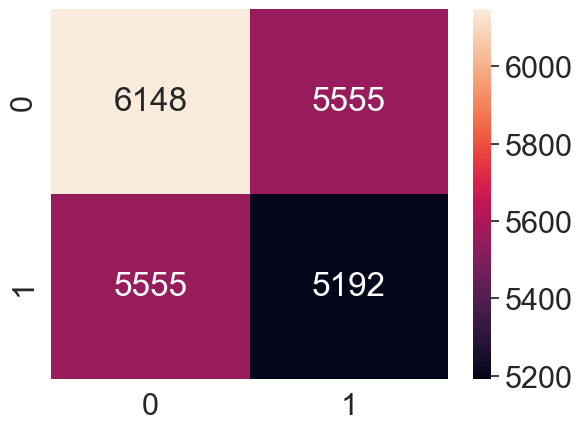

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_y, test_y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g')


In [60]:
from sklearn.metrics import classification_report

# Calculate the precision, recall, and F1-score
report = classification_report(test_y, test_y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.53      0.53      0.53     11703
           1       0.48      0.48      0.48     10747

    accuracy                           0.51     22450
   macro avg       0.50      0.50      0.50     22450
weighted avg       0.51      0.51      0.51     22450



In [61]:
import matplotlib.pyplot as plt


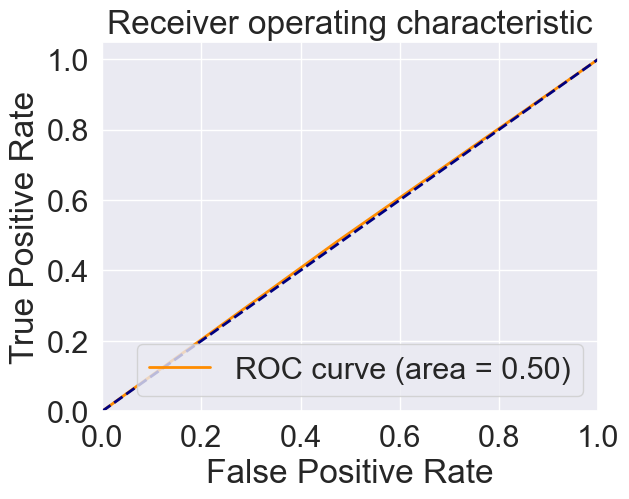

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc


# Convert string labels to numerical values
le = LabelEncoder()
test_y = le.fit_transform(test_y)
test_y_pred = le.transform(test_y_pred)

# Calculate the false positive rate and true positive rate for the ROC curve
fpr, tpr, thresholds = roc_curve(test_y, test_y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### Misclassified wordss from test data

In [63]:
from collections import Counter

# Load the new data and its predicted labels into a pandas DataFrame
new_data_pred = pd.DataFrame({'text': test_data['text'], 'true_label': test_y, 'predicted_label': test_y_pred})

# Identify instances where the model made incorrect predictions
misclassified = new_data_pred[new_data_pred['true_label'] != new_data_pred['predicted_label']]

# Print the number of misclassified instances
print('Number of misclassified instances:', len(misclassified))

# Print a sample of misclassified instances
print('\nSample of misclassified instances:\n')
print(misclassified.sample(10))

# Identify common patterns or features among misclassified instances
common_words = Counter(' '.join(misclassified['text']).split()).most_common(10)
print('\nMost common words among misclassified instances:\n', common_words)


Number of misclassified instances: 11110

Sample of misclassified instances:

                                                    text  true_label  \
3059   WASHINGTON (Reuters) - The chief executive of ...           0   
6805   UNITED NATIONS (Reuters) - The United States s...           0   
11564  The families of eleven American soldiers who l...           1   
960    UNITED NATIONS (Reuters) - Russia s U.N. Ambas...           0   
16144  Hillary Clinton adviser Philippe Reines at the...           1   
18799  On Wednesday, Rachel Maddow made a comparison ...           1   
8023   PARIS (Reuters) - France s foreign minister sa...           0   
11536  Who didn t miss Saturday Night Live s take on ...           1   
9888   TRIPOLI (Reuters) - Libya s rival factions sho...           0   
12367  First it was the FLUSH TARGET  campaign, where...           1   

       predicted_label  
3059                 1  
6805                 1  
11564                0  
960                  1  
1614

#### Where the misclassified instance is seen in this model

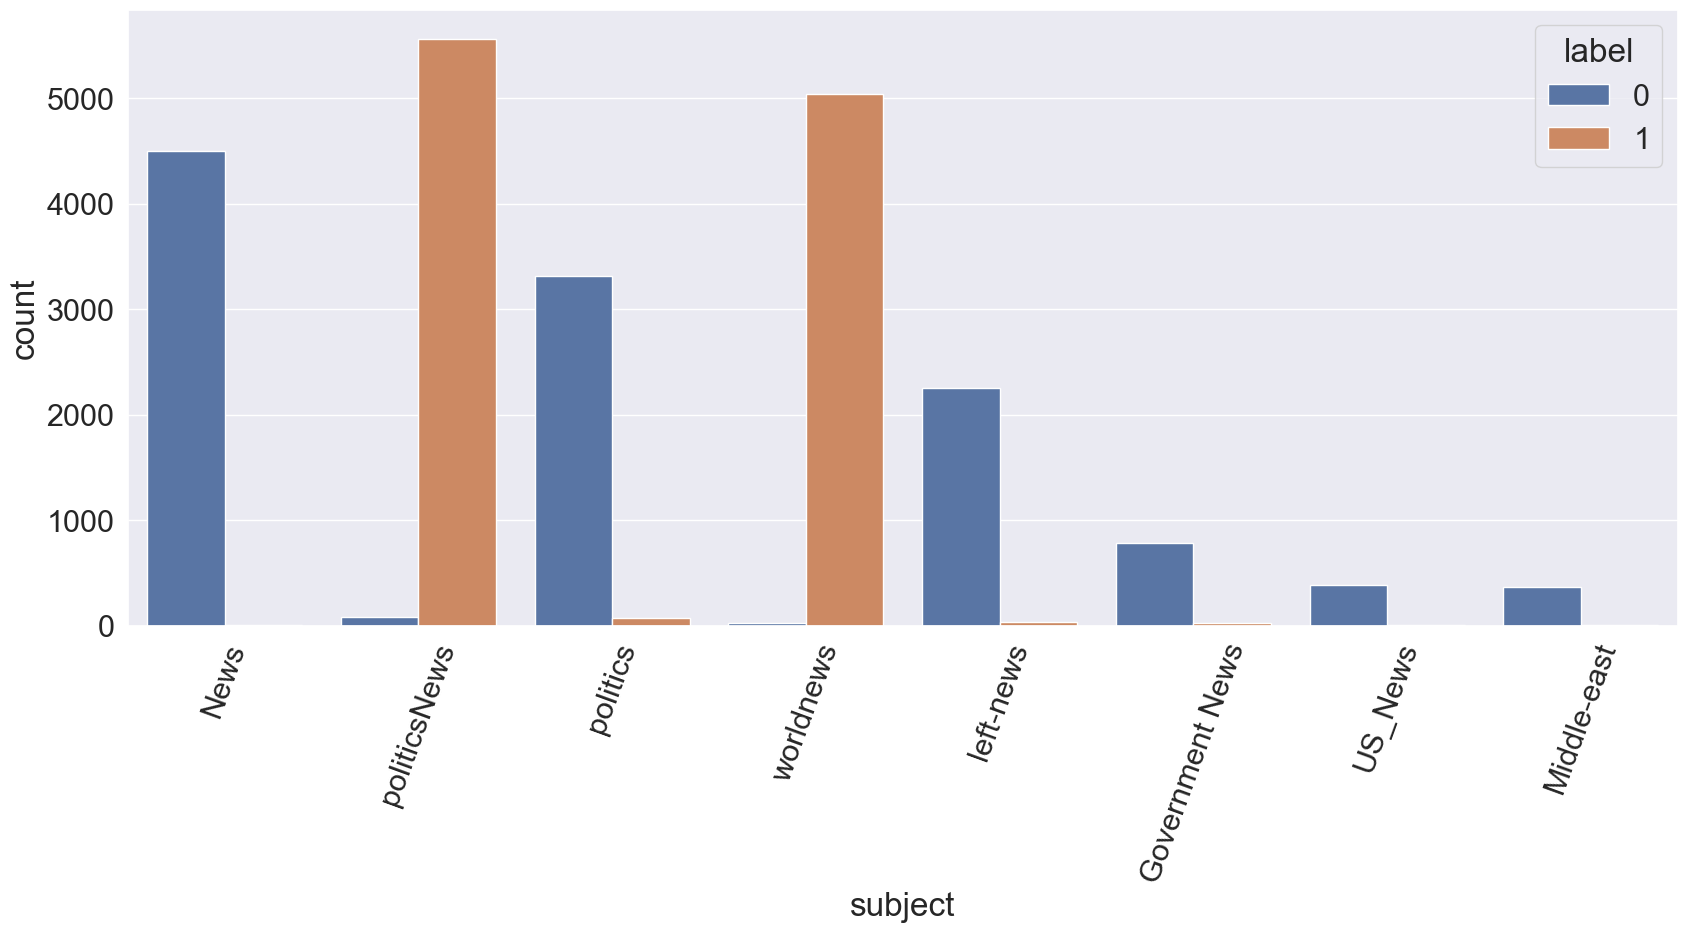

In [64]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="subject", hue="label", data=test_data)

plt.xticks(rotation=70)
plt.show()

#### Word instances with correct lables

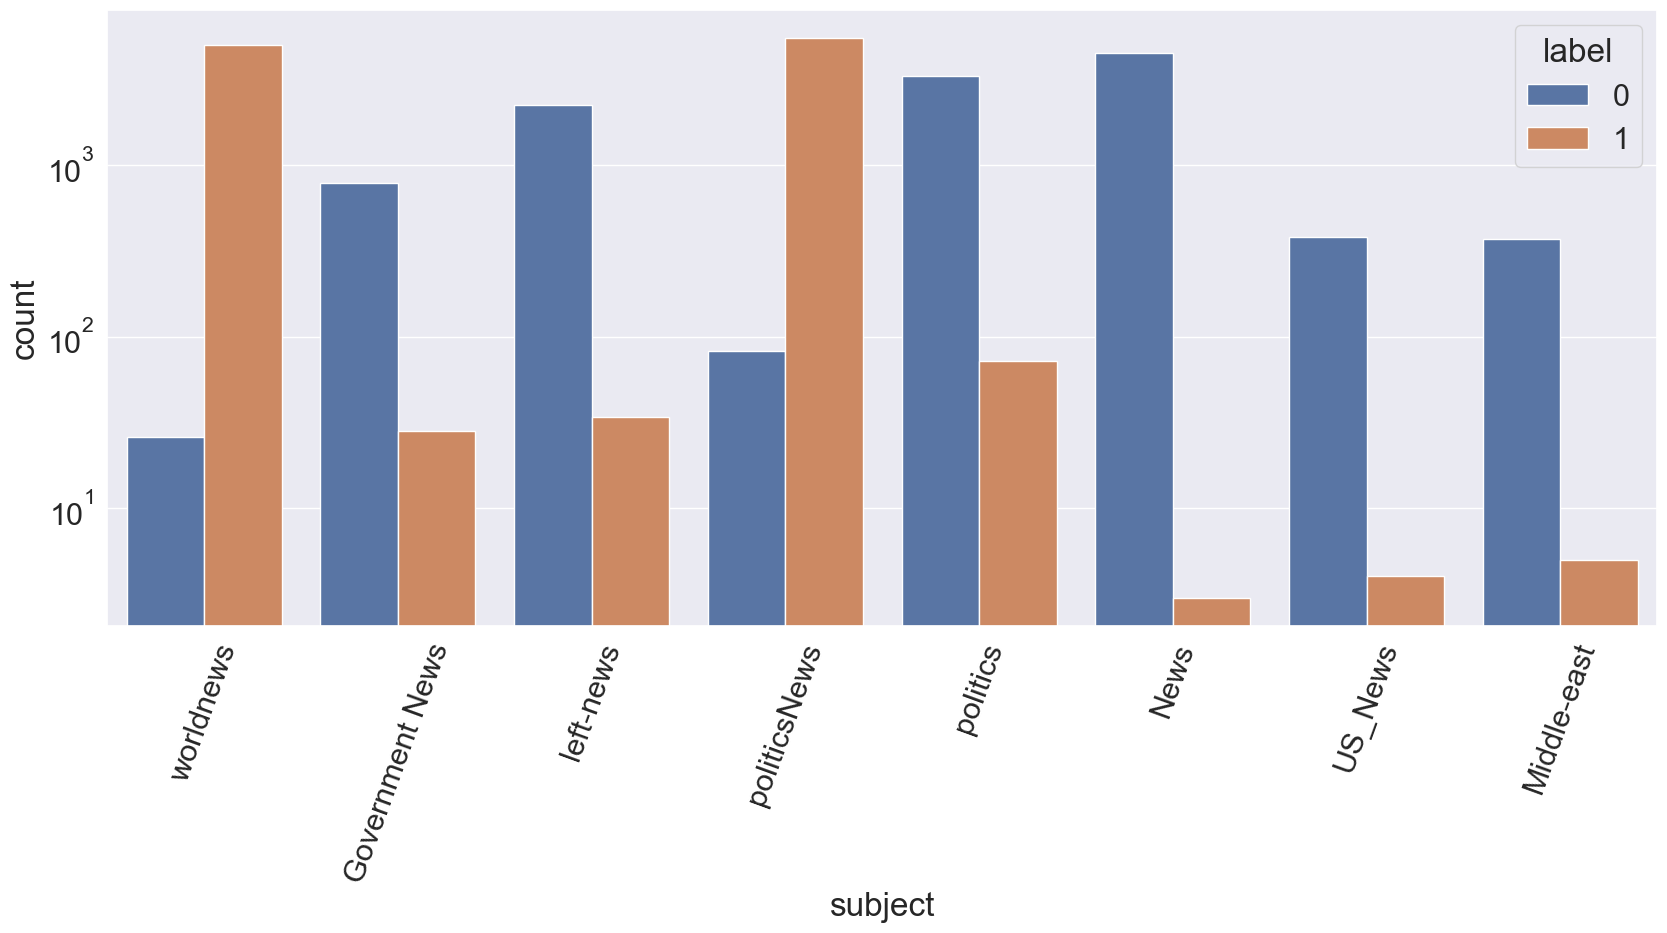

In [65]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="subject", hue="label", data=test_data1)

ax.set_yscale("log")
plt.xticks(rotation=70)
plt.show()

### NAIVE BAYES ALGORITHM

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Convert the text into numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["text"])
y = data["label"]

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X, y)


MultinomialNB()

#### Naive Bayes prediction

In [67]:


# Transform the text into numerical features using the same vectorizer
X_new = vectorizer.transform(test_data["text"])

# Make predictions using the trained Naive Bayes model
y_pred = model.predict(X_new)

# Print the predicted labels
print(y_pred)


[0 0 0 ... 1 1 0]


In [68]:
test_data['label'] = y_pred
test_data

,title,text,subject,date,label
13821,One Crucial Detail On Budweiser’s New ‘Patrio...,The country woke up to confusion today as Budw...,News,"May 10, 2016",0
2325,"Immigration overhaul backers sing, dance, chan...","WASHINGTON (Reuters) - Dancing, singing, chant...",politicsNews,"April 18, 2016",0
14115,BREAKING: 28 YR OLD PALESTINIAN MUSLIM Feras M...,"28 year old Abdullah Faris Freatekh, aka Feras...",politics,"Oct 12, 2016",0
2698,Senate blocks bill that would override state G...,(Reuters) - The U.S. Senate on Wednesday block...,politicsNews,"March 16, 2016",1
7883,May says will 'honor commitments' to EU,BRUSSELS (Reuters) - Prime Minister Theresa Ma...,worldnews,"October 20, 2017",1
...,...,...,...,...,...
11964,WHY THIS AMERICAN Feels Safer With An ISIS Fla...,"This is hysterical, but sadly it s not far-fet...",politics,"Mar 4, 2016",0
21575,Seth MacFarlane Wants His Fellow Bernie Suppo...,Very outspoken Bernie Sanders supporter Seth M...,News,"April 8, 2016",0
5390,Swiss man gets suspended prison term for spyin...,FRANKFURT (Reuters) - A Swiss man was handed a...,worldnews,"November 9, 2017",1
860,"Mexico, El Salvador, Guatemala urge protection...",MEXICO CITY (Reuters) - Mexico and Central Ame...,politicsNews,"September 5, 2017",1


In [69]:
import pandas as pd
newtruedata = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\newdata_True.csv')
newfakedata = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\newdata_Fake.csv')

newfakedata["label"] = 0  # 0 for fake news
newtruedata["label"] = 1  # 1 for true news

# Combine the two dataframes into a single dataframe
newdata1 = pd.concat([newtruedata, newfakedata], ignore_index=True)

# Shuffle the data to ensure randomness
new_data1 = newdata1.sample(frac=1, random_state=42)
new_data1

true_labels = new_data1['label']

#### Acuuracy of Naive Bayes Algorithm

In [70]:
from sklearn import metrics

# Load the true labels for the new data (if available)
# This assumes that the true labels are stored in a column called 'label'



# Calculate the accuracy of the predictions
NaiveBayes_accuracy = metrics.accuracy_score(true_labels, y_pred)

# Calculate the precision, recall, and F1 score of the predictions
precision = metrics.precision_score(true_labels, y_pred)
recall = metrics.recall_score(true_labels, y_pred)
f1_score = metrics.f1_score(true_labels, y_pred)

# Print the evaluation metrics
print('NaiveBayes_accuracy:', NaiveBayes_accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

NaiveBayes_accuracy: 0.9517594654788418
Precision: 0.9463093471810089
Recall: 0.9529367821458586
F1 Score: 0.9496115014190666


#### confusion matrix after naive bayes

<AxesSubplot:>

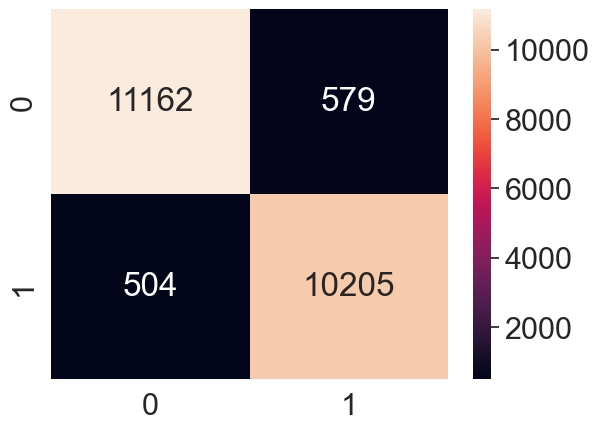

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g')


In [72]:
from sklearn.metrics import classification_report

# Calculate the precision, recall, and F1-score
report = classification_report(true_labels, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11741
           1       0.95      0.95      0.95     10709

    accuracy                           0.95     22450
   macro avg       0.95      0.95      0.95     22450
weighted avg       0.95      0.95      0.95     22450



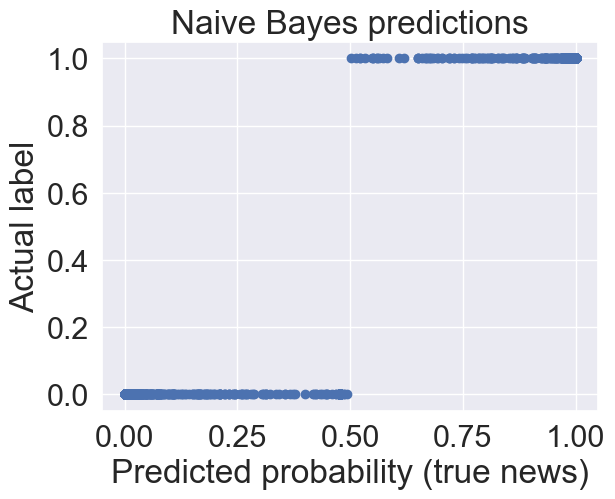

In [73]:
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
proba = model.predict_proba(X_new)

# Extract the probabilities for the positive class (i.e., true news)
true_proba = proba[:, 1]

# Create a scatter plot of the predicted probabilities versus the actual labels
plt.scatter(true_proba, y_pred)
plt.xlabel("Predicted probability (true news)")
plt.ylabel("Actual label")
plt.title("Naive Bayes predictions")
plt.show()


#### Misclassified instances in  naive bayes algorithm

In [74]:
from collections import Counter

# Load the new data and its predicted labels into a pandas DataFrame
new_data_pred = pd.DataFrame({'text': test_data['text'], 'true_label': true_labels, 'predicted_label': y_pred})

# Identify instances where the model made incorrect predictions
misclassified = new_data_pred[new_data_pred['true_label'] != new_data_pred['predicted_label']]

# Print the number of misclassified instances
print('Number of misclassified instances:', len(misclassified))

# Print a sample of misclassified instances
print('\nSample of misclassified instances:\n')
print(misclassified.sample(10))

# Identify common patterns or features among misclassified instances
common_words = Counter(' '.join(misclassified['text']).split()).most_common(10)
print('\nMost common words among misclassified instances:\n', common_words)


Number of misclassified instances: 1083

Sample of misclassified instances:

                                                    text  true_label  \
13903  During Obama s 8 years in office, he took a pa...           0   
4202   WASHINGTON (Reuters) - First lady Michelle Oba...           1   
16470  The Republican Party has been wishing that Ame...           0   
21991  It is truly a shame that our nation has $25 MI...           0   
20569  Perhaps the focus should be on the EPA and oth...           0   
9953   (Reuters) - Longtime U.S. congressman from Geo...           1   
20422  President Barack Obama has called the fight ag...           0   
523    WASHINGTON/NEW YORK (Reuters) - U.S. President...           1   
10820  Wow! The liberal Supreme Court s really making...           0   
20690  Corruption and socialism go hand in hand Brazi...           0   

       predicted_label  
13903                1  
4202                 0  
16470                1  
21991                1  
20569

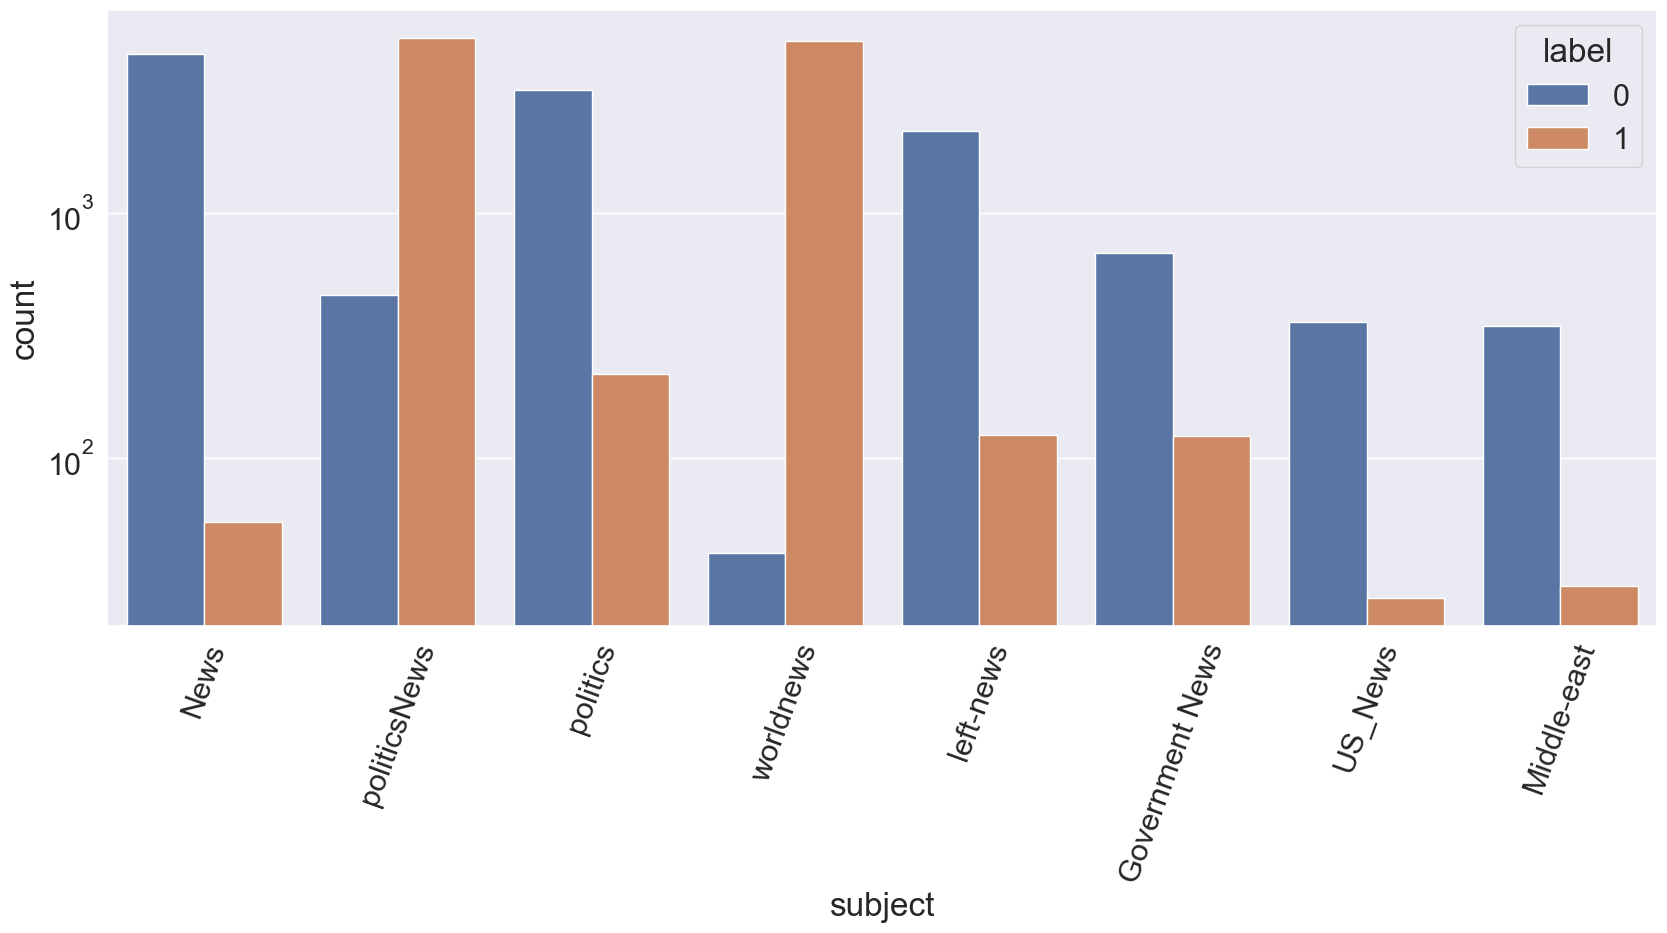

In [75]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="subject", hue="label", data=test_data)

ax.set_yscale("log")
plt.xticks(rotation=70)
plt.show()

#### Where the misclassified instance is seen in this model

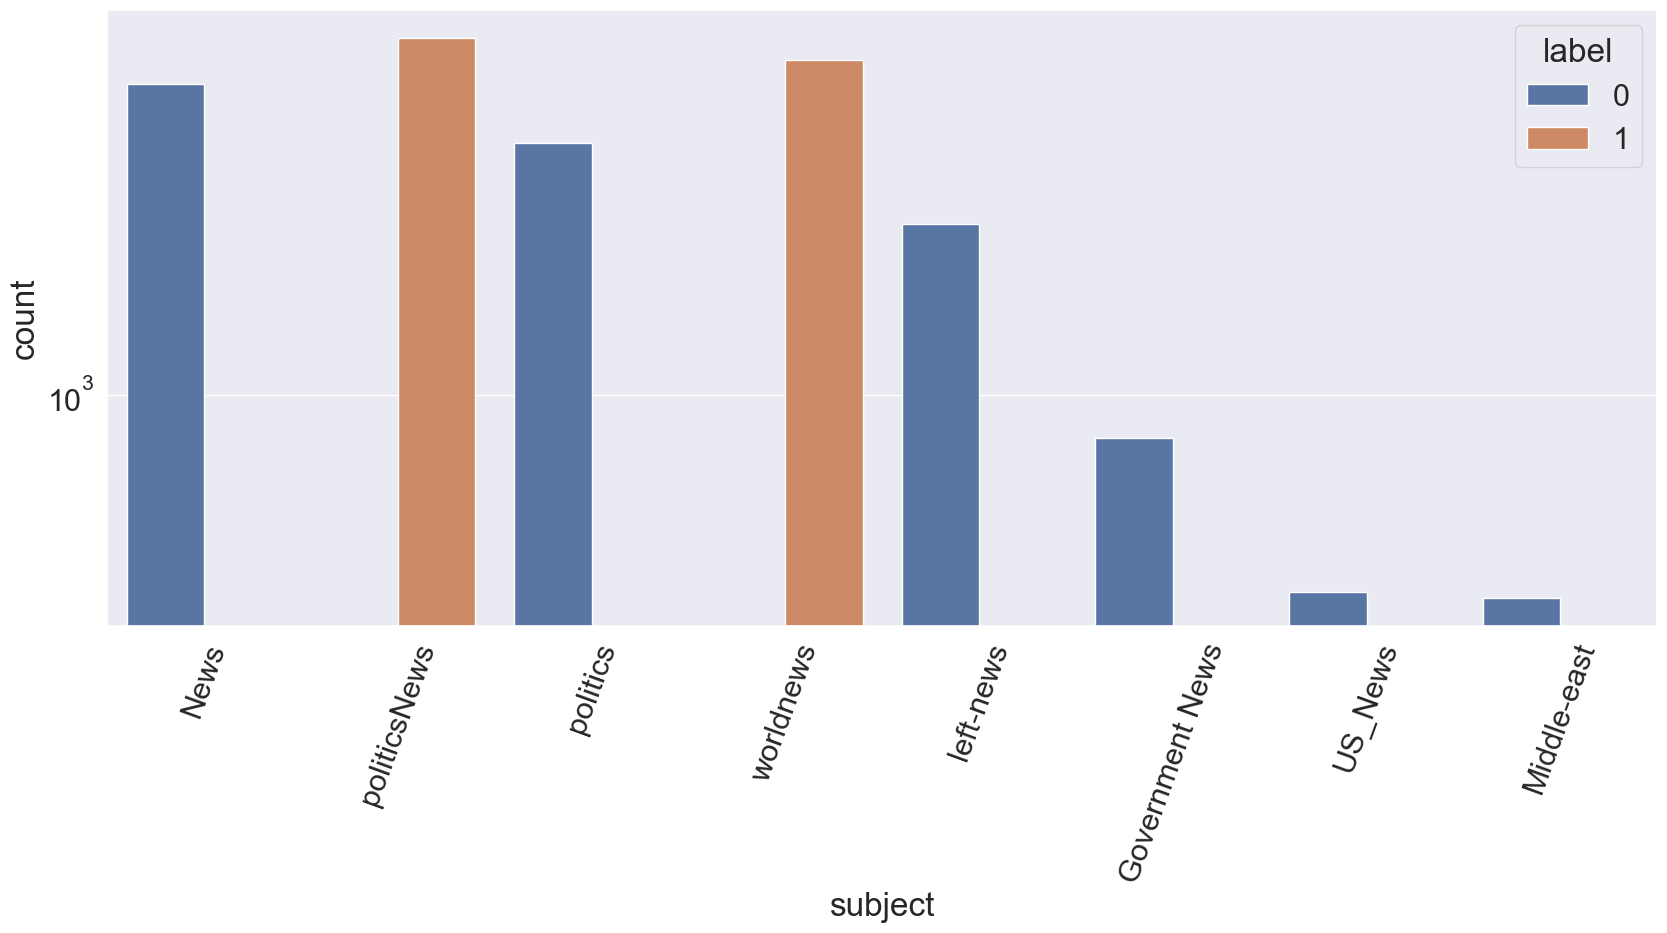

In [76]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

ax = sns.countplot(x="subject", hue="label", data=new_data1)
# Draw a nested barplot by species and sex
ax.set_yscale("log")
plt.xticks(rotation=70)
plt.show()

### RANDOM FOREST ALGORITHM

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data into features and target
X = data['text']
y = data['label']

# Create a TfidfVectorizer object to convert text to numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Convert text to numerical features
X = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Evaluation of trained data in Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create random forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9968819599109131


#### Prediction of Test data in Random Forest Classifier

In [79]:


# Convert text to numerical features using the same vectorizer object
X_new = vectorizer.transform(test_data['text'])

# Predict labels for the new data
y_new_pred = rf.predict(X_new)

# Print the predicted labels
#print('Predicted Labels:', y_new_pred)

y_new_pred


array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [80]:
test_data['label'] = y_new_pred
test_data


,title,text,subject,date,label
13821,One Crucial Detail On Budweiser’s New ‘Patrio...,The country woke up to confusion today as Budw...,News,"May 10, 2016",0
2325,"Immigration overhaul backers sing, dance, chan...","WASHINGTON (Reuters) - Dancing, singing, chant...",politicsNews,"April 18, 2016",1
14115,BREAKING: 28 YR OLD PALESTINIAN MUSLIM Feras M...,"28 year old Abdullah Faris Freatekh, aka Feras...",politics,"Oct 12, 2016",0
2698,Senate blocks bill that would override state G...,(Reuters) - The U.S. Senate on Wednesday block...,politicsNews,"March 16, 2016",1
7883,May says will 'honor commitments' to EU,BRUSSELS (Reuters) - Prime Minister Theresa Ma...,worldnews,"October 20, 2017",1
...,...,...,...,...,...
11964,WHY THIS AMERICAN Feels Safer With An ISIS Fla...,"This is hysterical, but sadly it s not far-fet...",politics,"Mar 4, 2016",0
21575,Seth MacFarlane Wants His Fellow Bernie Suppo...,Very outspoken Bernie Sanders supporter Seth M...,News,"April 8, 2016",0
5390,Swiss man gets suspended prison term for spyin...,FRANKFURT (Reuters) - A Swiss man was handed a...,worldnews,"November 9, 2017",1
860,"Mexico, El Salvador, Guatemala urge protection...",MEXICO CITY (Reuters) - Mexico and Central Ame...,politicsNews,"September 5, 2017",1


#### Accuracy and other parameters of Test Data

In [81]:
from sklearn import metrics

# Load the true labels for the new data (if available)
# This assumes that the true labels are stored in a column called 'label'


# Calculate the accuracy of the predictions
RF_accuracy = metrics.accuracy_score(true_labels, y_new_pred)

# Calculate the precision, recall, and F1 score of the predictions
precision = metrics.precision_score(true_labels, y_new_pred)
recall = metrics.recall_score(true_labels, y_new_pred)
f1_score = metrics.f1_score(true_labels, y_new_pred)

# Print the evaluation metrics
print('RF_accuracy:', RF_accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)


RF_accuracy: 0.9960356347438752
Precision: 0.9949664429530202
Recall: 0.9967317209823513
F1 Score: 0.995848299668797


#### confusion matrix of Random Forest Classifier

<AxesSubplot:>

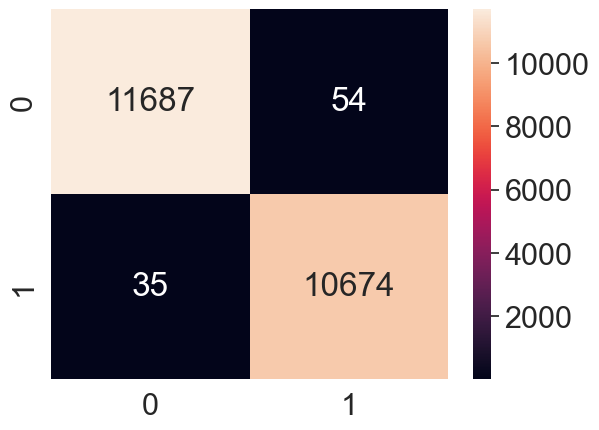

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, y_new_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g')


In [83]:
from sklearn.metrics import classification_report

# Calculate the precision, recall, and F1-score
report = classification_report(true_labels, y_new_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11741
           1       0.99      1.00      1.00     10709

    accuracy                           1.00     22450
   macro avg       1.00      1.00      1.00     22450
weighted avg       1.00      1.00      1.00     22450



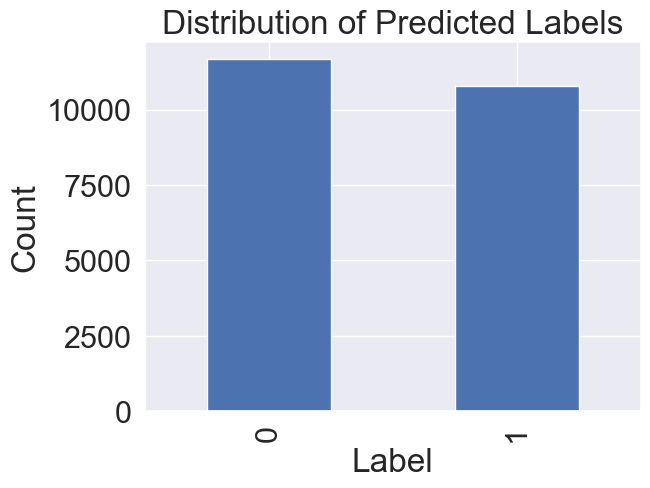

In [84]:
import matplotlib.pyplot as plt

# Count the predicted labels and plot a bar chart
new_data_pred['predicted_label'].value_counts().plot.bar()
plt.title('Distribution of Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


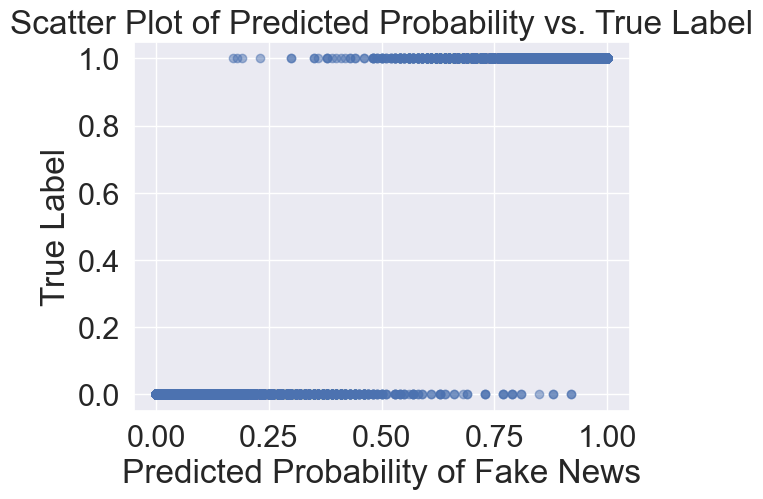

In [85]:
import matplotlib.pyplot as plt

# Load the new data and its predicted labels into a pandas DataFrame
new_data_pred = pd.DataFrame({'text': test_data['text'], 'true_label': true_labels, 'predicted_label': y_new_pred, 'predicted_proba': rf.predict_proba(X_new)[:,1]})

# Create a scatter plot of predicted probability vs. true label
plt.scatter(new_data_pred['predicted_proba'], new_data_pred['true_label'], alpha=0.5)

# Add axis labels and title
plt.xlabel('Predicted Probability of Fake News')
plt.ylabel('True Label')
plt.title('Scatter Plot of Predicted Probability vs. True Label')

# Show the plot
plt.show()


#### Misclassified News instances

In [86]:
# Load the new data and its predicted labels into a pandas DataFrame
new_data_pred = pd.DataFrame({'text': test_data['text'], 'true_label': true_labels, 'predicted_label': y_new_pred})

# Identify instances where the model made incorrect predictions
misclassified = new_data_pred[new_data_pred['true_label'] != new_data_pred['predicted_label']]

# Print the number of misclassified instances
print('Number of misclassified instances:', len(misclassified))

# Print a sample of misclassified instances
print('\nSample of misclassified instances:\n')
print(misclassified.sample(10))

# Identify common patterns or features among misclassified instances
common_words = Counter(' '.join(misclassified['text']).split()).most_common(10)
print('\nMost common words among misclassified instances:\n', common_words)


Number of misclassified instances: 89

Sample of misclassified instances:

                                                    text  true_label  \
19419  21st Century Wire says This will rank as one o...           0   
4924   WASHINGTON (Reuters) - The U.S. Supreme Court ...           1   
15049  Just like Obamacare was pushed through, the Ir...           0   
3798   NEW YORK (Thomson Reuters Foundation) - As a S...           1   
18967  Israel s transportation minister is pushing ah...           0   
8190   LONDON (Reuters) - Britain s Prince Harry and ...           1   
5022   WASHINGTON (Reuters) - U.S. Republican preside...           1   
15598  Vietnam has supposedly made modest gains in re...           0   
2376   WASHINGTON/NEW YORK - Democratic presidential ...           1   
17318  B..b..but That can t be right Maybe we should ...           0   

       predicted_label  
19419                1  
4924                 0  
15049                1  
3798                 0  
18967  

#### Bar graph of the data with lables provided

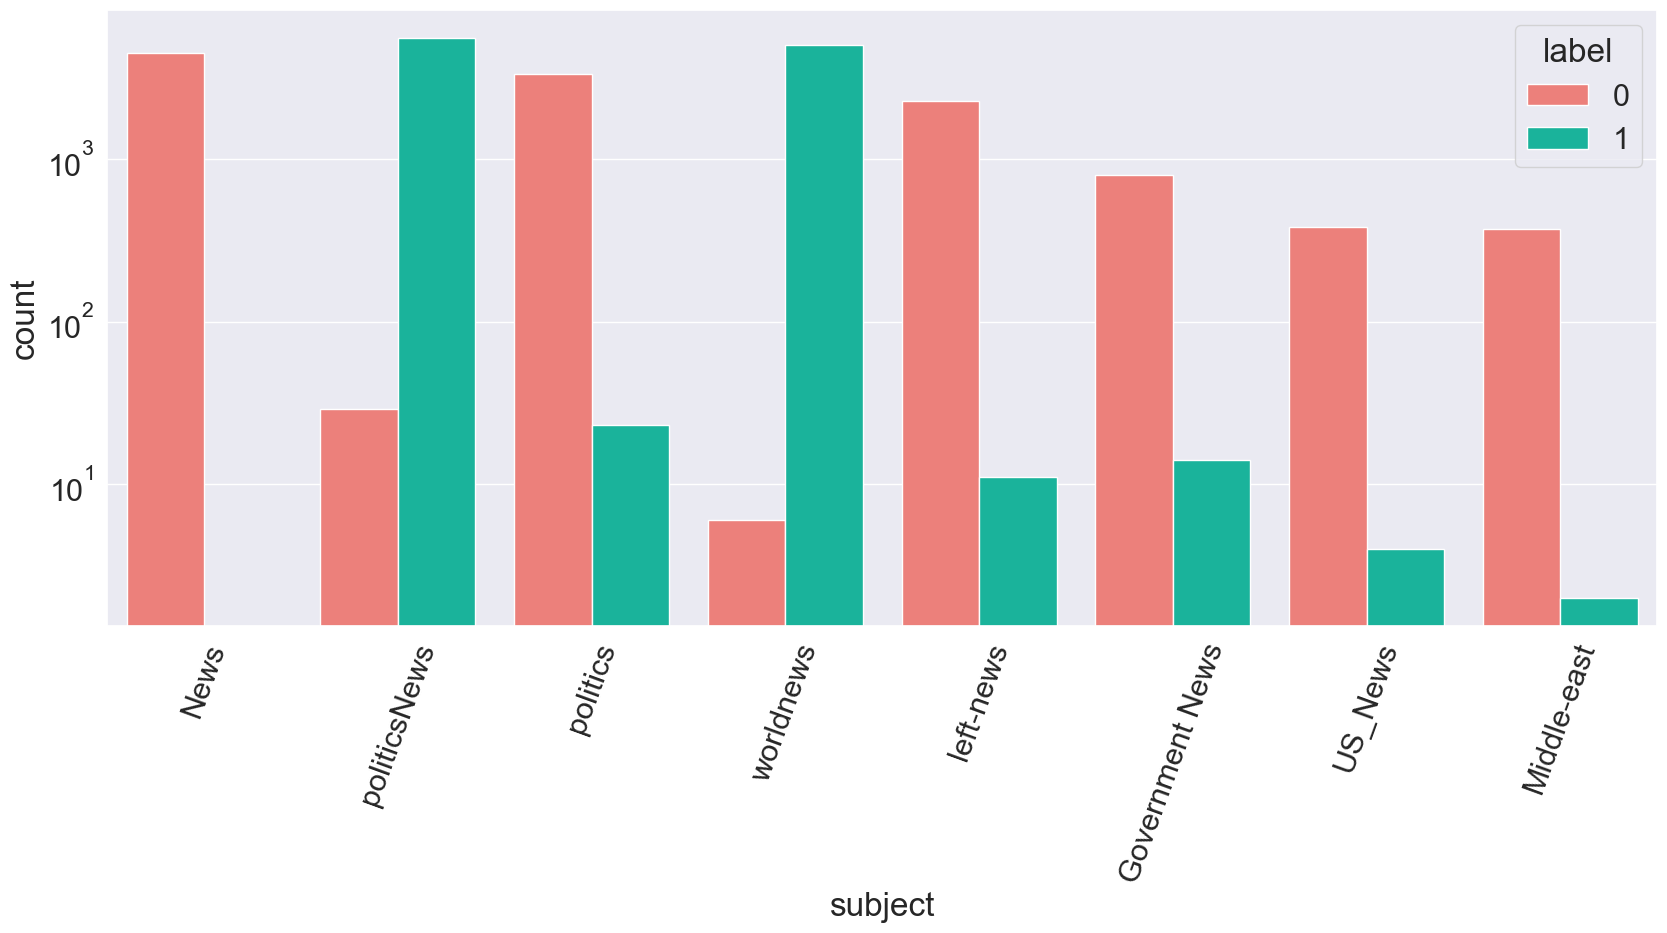

In [87]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big

custom_palette = ["#FF6F68", "#00CDAC"]

ax = sns.countplot(x="subject", hue="label", data=test_data, palette=custom_palette)


ax.set_yscale("log")
plt.xticks(rotation=70)
plt.show()

#### Area where the misclassified instance is seen in this model

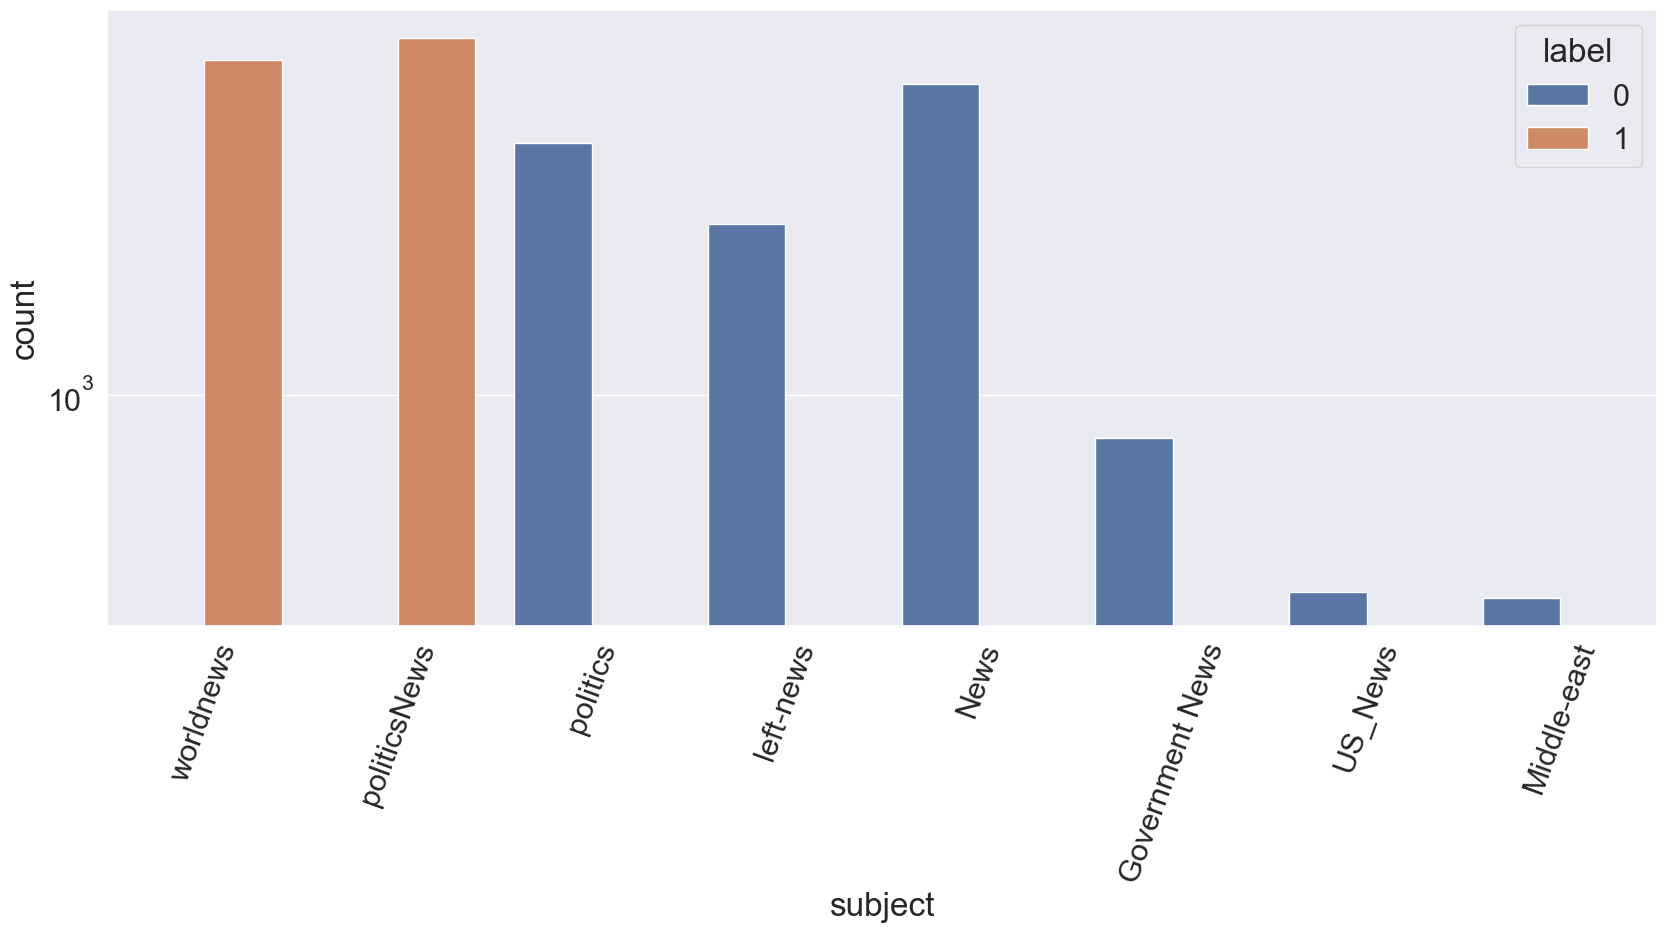

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
sns.set(font_scale=2)  # crazy big


ax = sns.countplot(x="subject", hue="label", data=newdata1)

ax.set_yscale("log")
plt.xticks(rotation=70)
plt.show()

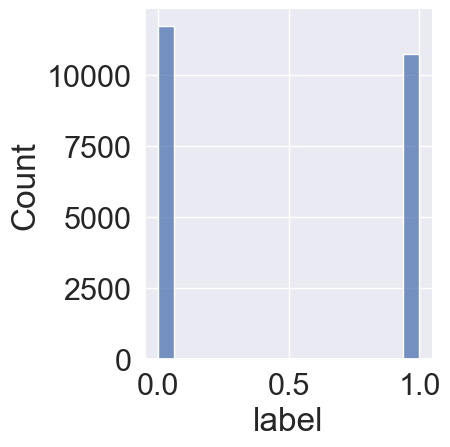

In [89]:
sns.displot(test_data['label'])

#### Comparison of accuracies for all the models

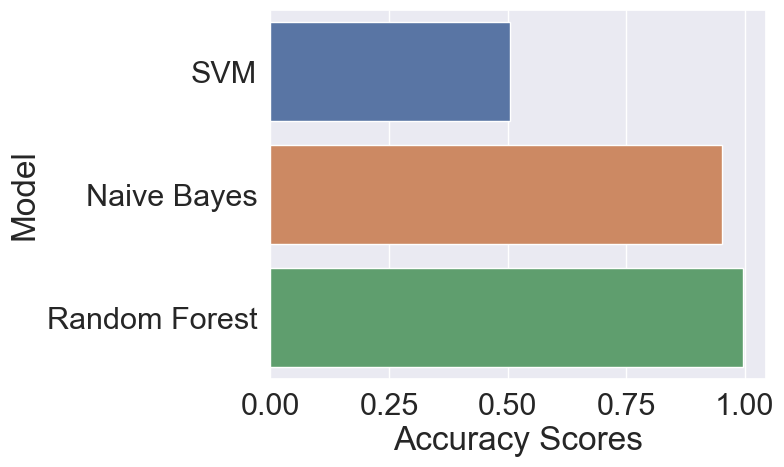

In [95]:
#compare the accuracy of the models
models = pd.DataFrame({
    'Model': ['SVM','Naive Bayes', 'Random Forest'],
    'Accuracy Scores': [SVM_accuracy,NaiveBayes_accuracy,RF_accuracy]})
models.sort_values(by='Accuracy Scores', ascending=False)

#visualize the accuracy of the models
sns.barplot(x='Accuracy Scores', y='Model', data=models)
plt.show()

#### Most repeated words in Fake News

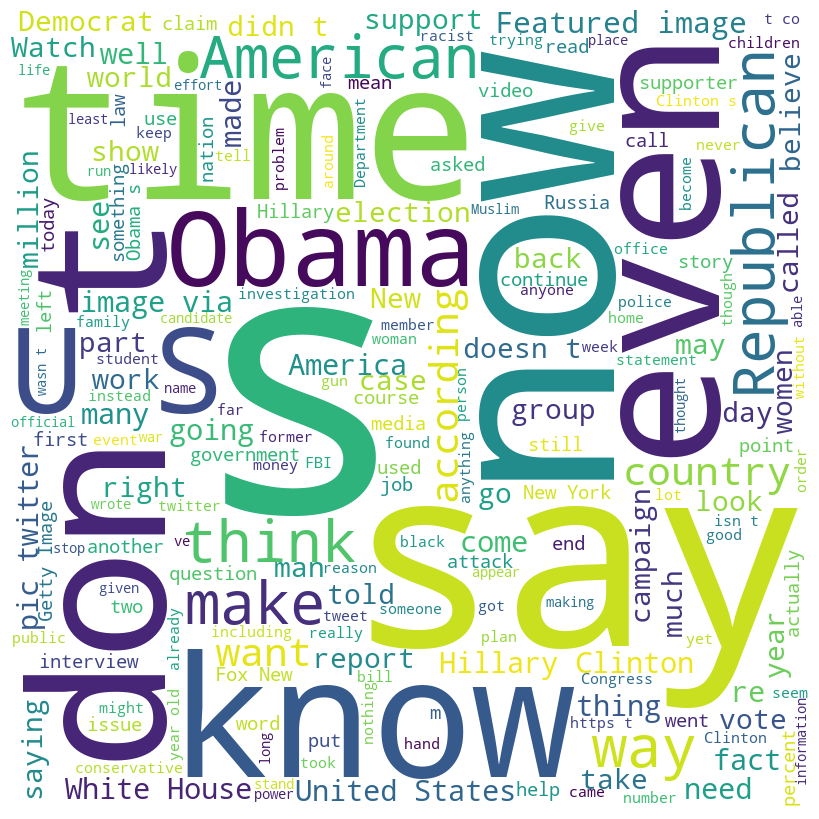

In [92]:
# Import the required libraries
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\Fake.csv')

# Extract the text data from a column
text_data = ' '.join(data['text'].tolist())

# Define the top 10 most frequently occurring words
top_words = ['Trump', 'People', 'Democracy', 'Donald', 'Said', 'People', 'President', 'One', 'US', 'Will','United State', 'State','White House']

# Create a set of stop words that includes the top 10 words
stopwords = set(STOPWORDS)
for word in top_words:
    stopwords.add(word)

# Create a word cloud object with the stop words
wordcloud = WordCloud(width=800, height=800, 
                background_color='white', 
                stopwords=stopwords, 
                min_font_size=10).generate(text_data) 

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.show()


#### Most repeated words in True News

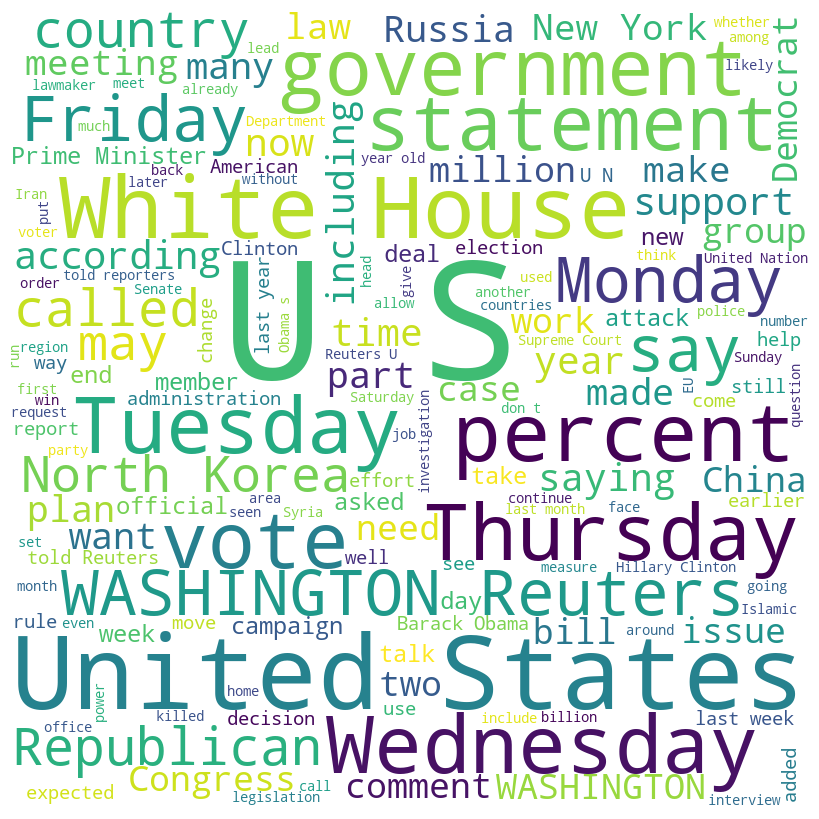

In [93]:
# Import the required libraries
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(r'C:\Users\khazi\Desktop\archive\News _dataset\True.csv')

# Extract the text data from a column
text_data = ' '.join(data['text'].tolist())

# Define the top 10 most frequently occurring words
top_words = ['Trump', 'People', 'Democracy', 'Donald', 'Said', 'People', 'President', 'One', 'US', 'Will', 'United States', 'State','White House']

# Create a set of stop words that includes the top 10 words
stopwords = set(STOPWORDS)
for word in top_words:
    stopwords.add(word)

# Create a word cloud object with the stop words
wordcloud = WordCloud(width=800, height=800, 
                background_color='white', 
                stopwords=stopwords, 
                min_font_size=10).generate(text_data) 

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.show()
